In [1]:
cd /blue/adamginsburg/adamginsburg/jwst/brick/

/blue/adamginsburg/adamginsburg/jwst/brick


In [2]:
%matplotlib inline

In [3]:
from astropy.table import Table
import pylab as pl
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
import numpy as np

## First check: compare F466N nrca-realigned-to-refcat positions to refcat 405n

In [4]:
f466tb = Table.read('F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv')
f466fh = fits.open('F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_realigned-to-refcat.fits')
ww =  WCS(f466fh['SCI'].header)
cat = f466tb
skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

Set OBSGEO-B to   -20.693175 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526785127.355 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
reftb = Table.read("catalogs/crowdsource_based_nircam-f405n_reference_astrometric_catalog_truncated10000.ecsv")
reference_coordinates = reftb['skycoord']

In [6]:
sel = slice(None)
max_offset = 0.2*u.arcsec
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)

In [7]:
from astropy import stats

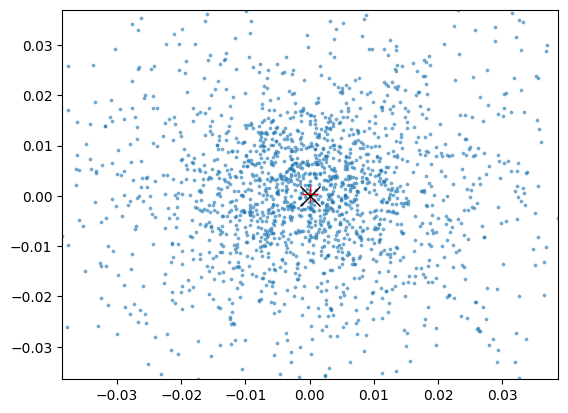

In [8]:
pl.scatter(dra, ddec, s=3, alpha=0.5)
pl.plot(np.median(dra), np.median(ddec), 'r+', markersize=12)
pl.plot([0], [0], 'kx', markersize=15)
stdra = stats.mad_std(dra)
stddec = stats.mad_std(ddec)
pl.axis(u.Quantity([np.median(dra) - stdra*2, np.median(dra) + stdra*2,
                    np.median(ddec) - stddec*2, np.median(ddec) + stddec*2,]).value);

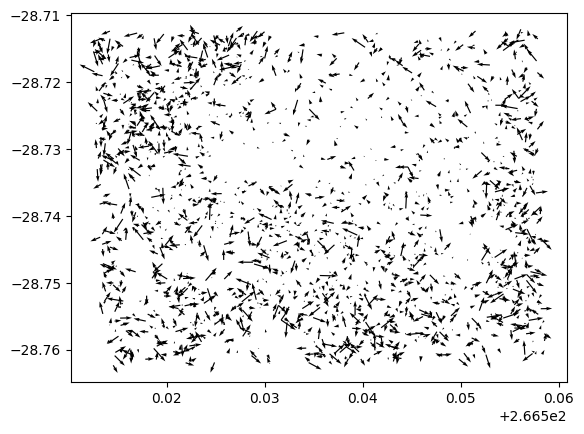

In [9]:
ok = (dra**2+ddec**2)**0.5 < 0.05*u.arcsec
pl.quiver(skycrds_cat[sel][idx].ra.deg[ok], skycrds_cat[sel][idx].dec.deg[ok], dra.value[ok], ddec.value[ok]) 

## Measure offsets between each exposure in F405N/F466N and the refcat

In [10]:
import warnings

In [11]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        f405tb = Table.read(f'F405N/pipeline/jw02221001001_03101_00001_nrc{ab}long_destreak_cat.ecsv')
        f405fh = fits.open(f'F405N/pipeline/jw02221001001_03101_00001_nrc{ab}long_cal.fits')
        ww =  WCS(f405fh['SCI'].header)
        cat = f405tb
        skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])
        
        sel = slice(None)
        max_offset = 0.2*u.arcsec
        idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
        dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
        ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
        print(ab, np.median(dra), np.median(ddec))

a 0.114006 arcsec -0.0959165 arcsec
b 0.122153 arcsec -0.0973394 arcsec


In [12]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        for expno in range(1,25):
            f466tb = Table.read(f'F466N/pipeline/jw02221001001_05101_000{expno:02d}_nrc{ab}long_destreak_cat.ecsv')
            f466fh = fits.open(f'F466N/pipeline/jw02221001001_05101_000{expno:02d}_nrc{ab}long_cal.fits')
            ww =  WCS(f466fh['SCI'].header)
            cat = f466tb
            skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])

            sel = slice(None)
            max_offset = 0.2*u.arcsec
            idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
            dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
            ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
            print(ab, expno, np.median(dra), np.median(ddec))

a 1 0.126357 arcsec -0.0918235 arcsec
a 2 0.129599 arcsec -0.093564 arcsec
a 3 0.128123 arcsec -0.0910545 arcsec
a 4 0.12761 arcsec -0.0929082 arcsec
a 5 0.123859 arcsec -0.0937921 arcsec
a 6 0.125083 arcsec -0.0934988 arcsec
a 7 0.123547 arcsec -0.0930667 arcsec
a 8 0.123514 arcsec -0.0935084 arcsec
a 9 0.131473 arcsec -0.0960653 arcsec
a 10 0.132986 arcsec -0.0944966 arcsec
a 11 0.131564 arcsec -0.0954422 arcsec
a 12 0.131413 arcsec -0.0967772 arcsec
a 13 0.135099 arcsec -0.097868 arcsec
a 14 0.132879 arcsec -0.0973897 arcsec
a 15 0.134153 arcsec -0.0973287 arcsec
a 16 0.135401 arcsec -0.0994521 arcsec
a 17 0.13662 arcsec -0.0951246 arcsec
a 18 0.136197 arcsec -0.092325 arcsec
a 19 0.136026 arcsec -0.0947602 arcsec
a 20 0.137106 arcsec -0.0951123 arcsec
a 21 0.13325 arcsec -0.0945543 arcsec
a 22 0.133808 arcsec -0.0941786 arcsec
a 23 0.137886 arcsec -0.0960956 arcsec
a 24 0.132603 arcsec -0.0932896 arcsec
b 1 0.111766 arcsec -0.102392 arcsec
b 2 0.113691 arcsec -0.101195 arcsec
b 3 0

In [13]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        f410tb = Table.read(f'F410M/pipeline/jw02221001001_07101_00001_nrc{ab}long_destreak_cat.ecsv')
        f410fh = fits.open(f'F410M/pipeline/jw02221001001_07101_00001_nrc{ab}long_cal.fits')
        ww =  WCS(f410fh['SCI'].header)
        cat = f410tb
        skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])
        
        sel = slice(None)
        max_offset = 0.2*u.arcsec
        idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
        dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
        ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
        print(ab, np.median(dra), np.median(ddec))

a 0.137023 arcsec -0.0693611 arcsec
b 0.0959411 arcsec -0.126803 arcsec


In [14]:
import warnings

## 212

In [15]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        for mod in range(1,5):
            f212tb = Table.read(f'F212N/pipeline/jw02221001001_05101_00001_nrc{ab}{mod}_destreak_cat.fits')
            f212fh = fits.open(f'F212N/pipeline/jw02221001001_05101_00001_nrc{ab}{mod}_destreak_o001_crf.fits')
            ww =  WCS(f212fh['SCI'].header)
            cat = f212tb
            skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])

            sel = slice(None)
            max_offset = 0.2*u.arcsec
            idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
            dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
            ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
            print(ab, mod, np.median(dra), np.median(ddec))

a 1 -0.006012 arcsec 0.0027499 arcsec
a 2 -0.00427582 arcsec 0.00260291 arcsec
a 3 -0.00599471 arcsec 0.00159593 arcsec
a 4 -0.00451484 arcsec 0.00158293 arcsec
b 1 -0.00579359 arcsec 0.00291074 arcsec
b 2 -0.00598345 arcsec 0.00381374 arcsec
b 3 -0.0060289 arcsec 0.00313349 arcsec
b 4 -0.00576609 arcsec 0.000900725 arcsec


## 187

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        for mod in range(1,5):
            f187tb = Table.read(f'F187N/pipeline/jw02221001001_03101_00001_nrc{ab}{mod}_destreak_cat.fits')
            f187fh = fits.open(f'F187N/pipeline/jw02221001001_03101_00001_nrc{ab}{mod}_destreak_o001_crf.fits')
            ww =  WCS(f187fh['SCI'].header)
            cat = f187tb
            skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])

            sel = slice(None)
            max_offset = 0.2*u.arcsec
            idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
            dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
            ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
            print(ab, mod, np.median(dra), np.median(ddec))

a 1 -0.00569045 arcsec 0.00326472 arcsec
a 2 -0.0043038 arcsec 0.00214872 arcsec
a 3 -0.00595539 arcsec 0.00163607 arcsec
a 4 -0.00383361 arcsec 0.00208043 arcsec
b 1 -0.00622623 arcsec 0.00360356 arcsec
b 2 -0.00734299 arcsec 0.00438258 arcsec
b 3 -0.00710636 arcsec 0.00373404 arcsec
b 4 -0.00564276 arcsec 0.00213694 arcsec


## 182

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        for mod in range(1,5):
            f182tb = Table.read(f'F182M/pipeline/jw02221001001_07101_00001_nrc{ab}{mod}_destreak_cat.fits')
            f182fh = fits.open(f'F182M/pipeline/jw02221001001_07101_00001_nrc{ab}{mod}_destreak_o001_crf.fits')
            ww =  WCS(f182fh['SCI'].header)
            cat = f182tb
            skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])

            sel = slice(None)
            max_offset = 0.2*u.arcsec
            idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
            dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
            ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
            print(ab, mod, np.median(dra), np.median(ddec))

a 1 -0.00536439 arcsec 0.00159978 arcsec
a 2 -0.00346042 arcsec 0.00217289 arcsec
a 3 -0.00484161 arcsec 0.00246531 arcsec
a 4 -0.00368242 arcsec 0.000795476 arcsec
b 1 -0.00494804 arcsec 0.00260466 arcsec
b 2 -0.0057023 arcsec 0.00396764 arcsec
b 3 -0.00656044 arcsec 0.00182062 arcsec
b 4 -0.00555986 arcsec 0.00250535 arcsec


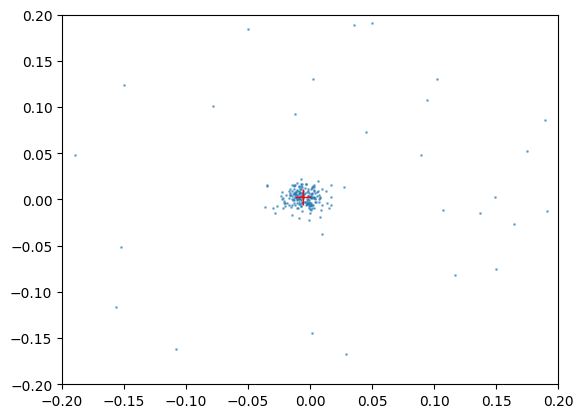

In [18]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.plot(np.median(dra), np.median(ddec), 'r+', markersize=12)
stdra = stats.mad_std(dra)
stddec = stats.mad_std(ddec)
pl.axis(u.Quantity([np.median(dra) - stdra*2, np.median(dra) + stdra*2,
                    np.median(ddec) - stddec*2, np.median(ddec) + stddec*2,]).value);
pl.axis([-0.2,0.2,-0.2,0.2]);


# insanity check

In [19]:
reftb = Table.read("catalogs/crowdsource_based_nircam-f405n_reference_astrometric_catalog_truncated10000.ecsv")
reference_coordinates = reftb['skycoord']

In [20]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        f410tb = Table.read(f'F410M/pipeline/jw02221001001_07101_00006_nrc{ab}long_destreak_cat.ecsv')
        f410fh = fits.open(f'F410M/pipeline/jw02221001001_07101_00006_nrc{ab}long_cal.fits')
        ww =  WCS(f410fh['SCI'].header)
        cat = f410tb
        skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])
        
        sel = slice(None)
        max_offset = 0.2*u.arcsec
        idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
        dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
        ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
        print(ab, len(idx), np.median(dra), np.median(ddec))

a 258 0.136686 arcsec -0.0725351 arcsec
b 269 0.0966121 arcsec -0.12935 arcsec


In [21]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for ab in 'ab':
        expno = 11
        f466tb = Table.read(f'F466N/pipeline/jw02221001001_05101_000{expno:02d}_nrc{ab}long_destreak_cat.ecsv')
        f466fh = fits.open(f'F466N/pipeline/jw02221001001_05101_000{expno:02d}_nrc{ab}long_destreak.fits')
        ww =  WCS(f466fh['SCI'].header)
        cat = f466tb
        skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])

        sel = slice(None)
        max_offset = 0.2*u.arcsec
        idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
        dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
        ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
        print(ab, expno, len(idx), np.median(dra), np.median(ddec), len(skycrds_cat))

a 11 223 0.000490041 arcsec 9.06828e-05 arcsec 500
b 11 213 -2.29647e-05 arcsec 0.000751344 arcsec 500


# Figure out where the coordinates are getting lost...

In [22]:
from jwst.datamodels import ImageModel
from astropy.visualization import simple_norm

In [23]:
pwd

'/blue/adamginsburg/adamginsburg/jwst/brick'

In [24]:
basename = 'F466N/pipeline/jw02221001001_05101_00001_nrcalong'

In [25]:
ls -lhrt F466N/pipeline/jw02221001001_05101_00001_nrcalong*

-rw-r--r-- 1 adamginsburg adamginsburg  25M Feb 18  2023 F466N/pipeline/jw02221001001_05101_00001_nrcalong_uncal.fits
-rw-r--r-- 1 adamginsburg adamginsburg  30K Jun 29  2023 F466N/pipeline/jw02221001001_05101_00001_nrcalong_cal_cat.ecsv
-rw-r--r-- 1 adamginsburg adamginsburg 113M Jun 29  2023 F466N/pipeline/jw02221001001_05101_00001_nrcalong_o001_crf.fits
-rw-r--r-- 1 adamginsburg adamginsburg  30K Oct  6  2023 F466N/pipeline/jw02221001001_05101_00001_nrcalong_destreak_cat.ecsv
-rw-r--r-- 1 adamginsburg adamginsburg  26M Oct  6  2023 F466N/pipeline/jw02221001001_05101_00001_nrcalong_outlier_o001_median.fits
-rw-r--r-- 1 adamginsburg adamginsburg  77M Feb 17 10:00 F466N/pipeline/jw02221001001_05101_00001_nrcalong_outlier_i2d.fits
-rw-r--r-- 1 adamginsburg adamginsburg  26M Feb 17 10:04 F466N/pipeline/jw02221001001_05101_00001_nrcalong_o001_median.fits
-rw-r--r-- 1 adamginsburg adamginsburg  49M Jul 17 21:12 F466N/pipeline/jw02221001001_05101_00001_nrcalong_trapsfilled.fits
-rw-r--r-- 1

In [26]:
suffixes = "cal", "destreak", "align", "destreak_o001_crf", "destreak_outlier_i2d", "destreak_tweakreg", "i2d", "o001_crf", "outlier_i2d", "o001_median"

In [27]:
for ii, suf in enumerate(suffixes):
    try:
        img = ImageModel(f'{basename}_{suf}.fits')
        print(img.meta.group_id)
        print(img.meta.filename)
    except:
        pass

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/asdf/entry_points.py:48: AsdfWarning: asdf_extensions plugin from package specutils==1.9.1 failed to load:

ModuleNotFoundError: No module named 'astropy.io.misc.asdf.extension'
  warnings.warn(
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/asdf/yamlutil.py:305: AsdfConversionWarning: tag:stsci.edu:gwcs/wcs-1.2.0 is not recognized, converting to raw Python data structure
  warnings.warn(


jw02221001001_05101_1
jw02221001001_05101_00001_nrcalong_cal.fits


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/asdf/yamlutil.py:305: AsdfConversionWarning: tag:stsci.edu:gwcs/wcs-1.2.0 is not recognized, converting to raw Python data structure
  warnings.warn(


jw02221001001_05101_1
jw02221001001_05101_00001_nrcalong_destreak.fits


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/asdf/yamlutil.py:305: AsdfConversionWarning: tag:stsci.edu:gwcs/wcs-1.2.0 is not recognized, converting to raw Python data structure
  warnings.warn(


jw02221001001_05101_1
jw02221001001_05101_00001_nrcalong_destreak_o001_crf.fits


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/asdf/yamlutil.py:305: AsdfConversionWarning: tag:stsci.edu:gwcs/wcs-1.2.0 is not recognized, converting to raw Python data structure
  warnings.warn(


jw02221001001_05101_1
jw02221001001_05101_00001_nrcalong_destreak_tweakreg.fits


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/asdf/yamlutil.py:305: AsdfConversionWarning: tag:stsci.edu:gwcs/wcs-1.2.0 is not recognized, converting to raw Python data structure
  warnings.warn(


jw02221001001_05101_1
jw02221001001_05101_00001_nrcalong_o001_crf.fits


In [28]:
reftb = Table.read("catalogs/crowdsource_based_nircam-f405n_reference_astrometric_catalog_truncated10000.ecsv")
reference_coordinates = reftb['skycoord']
reftb_full = Table.read("catalogs/crowdsource_based_nircam-f405n_reference_astrometric_catalog.ecsv")
reference_coordinates_full = reftb_full['skycoord']

In [29]:
from astropy.wcs.wcsapi import SlicedLowLevelWCS
#SlicedLowLevelWCS(img.meta.wcs, [slice(100, 200), slice(100, 200)])

## Diagnostic plot: show all of the stages of stage3 pipeline

In [30]:
def diagnostic_plot(basename, corners=[500,700,500,700]):
    cat = Table.read(f'{basename}_destreak_cat.fits')
    pl.figure(figsize=(18,18))
    free_plots = []
    slc = (slice(corners[2], corners[3]), slice(corners[0], corners[1]))
    for ii, suf in enumerate(suffixes):
        fn = f'{basename}_{suf}.fits'
        if os.path.exists(fn):
            img = ImageModel(fn)
            ww = img.meta.wcs
            ax = pl.subplot(3, 3, ii+1, projection=SlicedLowLevelWCS(ww, slc))
            ax.imshow(img.data[slc], cmap='gray_r', norm=simple_norm(img.data, min_percent=1, max_percent=99, stretch='asinh'))
            #print(np.nanmax(img.data[slc]))
            ax.scatter(cat['x'], cat['y'], color='r', marker='x')
            #ax.scatter_coord(reference_coordinates_full, marker='+', color='c')
            ax.scatter_coord(reference_coordinates, marker='+', color='b')
            ax.axis(corners)
            ax.axis([0, corners[3]-corners[2], 0, corners[1]-corners[0]])
            ax.set_title(suf)
        else:
            free_plots.append(ii)

        if ii == 8:
            print(f"Skipping suffixes {suffixes[8:]}")
            break

    skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])
    idx, sidx, sep, _ = reference_coordinates.search_around_sky(skycrds_cat, 0.4*u.arcsec)

    dra = (skycrds_cat[idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
    ddec = (skycrds_cat[idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
    if len(free_plots) > 0:
        ii = free_plots[0]
    ax = pl.subplot(3, 3, ii+1)
    ax.cla()
    ax.quiver(skycrds_cat[idx].ra.to(u.deg).value, skycrds_cat[idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)


In [31]:
diagnostic_plot(basename = 'F466N/pipeline/jw02221001001_05101_00001_nrcalong', corners=[700,900,700,900])

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/asdf/yamlutil.py:305: AsdfConversionWarning: tag:stsci.edu:gwcs/wcs-1.2.0 is not recognized, converting to raw Python data structure
  warnings.warn(


AttributeError: No attribute 'pixel_n_dim'

<Figure size 1800x1800 with 0 Axes>

In [ ]:
diagnostic_plot(basename = 'F405N/pipeline/jw02221001001_03101_00001_nrcalong', corners=[650,850,800,1000])

In [ ]:
diagnostic_plot(basename = 'F405N/pipeline/jw02221001001_03101_00001_nrcblong', corners=[500,700,650,850])

In [ ]:
diagnostic_plot(basename = 'F405N/pipeline/jw02221001001_03101_00001_nrcblong', corners=[400,700,1750,2050])

In [ ]:
pl.figure(figsize=(10,10))
corners = [500,800,500,800]
fn = 'F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_i2d.fits'
img = ImageModel(fn)
ww = img.meta.wcs
ax = pl.subplot(1, 1, 1, projection=ww)
ax.imshow(img.data, cmap='gray_r', norm=simple_norm(img.data, min_percent=1, max_percent=99, stretch='asinh'))
#ax.scatter(cat['x'], cat['y'], color='r', marker='x')
#ax.scatter_coord(reference_coordinates_full, marker='+', color='c')
ax.scatter_coord(reference_coordinates, marker='x', color='r')
ax.axis(corners)

In [ ]:
pl.figure(figsize=(10,10))
corners = [500,800,500,800]
fn = 'F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_i2d.fits'
img = ImageModel(fn)
ww = img.meta.wcs
ax = pl.subplot(1, 1, 1, projection=ww)
ax.imshow(img.data, cmap='gray_r', norm=simple_norm(img.data, min_percent=1, max_percent=99, stretch='asinh'))
#ax.scatter(cat['x'], cat['y'], color='r', marker='x')
#ax.scatter_coord(reference_coordinates_full, marker='+', color='c')
ax.scatter_coord(reference_coordinates, marker='x', color='r')
ax.axis(corners)

## f405 merge check: this one ran and it looks like the contributing files all worked...

F405N/pipeline/jw02221001001_03101_00001_nrcalong_destreak_o001_crf

In [ ]:
ls -lh F405N/pipeline/jw02221001001_03101_00001_nrcalong*cat*

In [ ]:
pl.figure(figsize=(10,10))
corners = [2780, 2980, 620, 820]
slc = slice(corners[2], corners[3]), slice(corners[0], corners[1])
fn = 'F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_i2d.fits'
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_cat.ecsv')
# /orange/adamginsburg/jwst/brick/F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_i2d.fits

singleim = ImageModel('F405N/pipeline/jw02221001001_03101_00001_nrcalong_destreak_o001_crf.fits')
singlecat = Table.read('F405N/pipeline/jw02221001001_03101_00001_nrcalong_destreak_cat.fits')

img = ImageModel(fn)
ww = img.meta.wcs
ax = pl.subplot(1, 1, 1, projection=ww)
ax.imshow(img.data, cmap='gray_r', norm=simple_norm(img.data, min_percent=1, max_percent=99, stretch='asinh'))
#ax.scatter(cat['x'], cat['y'], color='r', marker='x')
#ax.scatter_coord(reference_coordinates_full, marker='+', color='c')
ax.scatter_coord(reference_coordinates, marker='x', color='r')
ax.scatter(thiscat['xcentroid'], thiscat['ycentroid'], color='g', marker='+')
ax.scatter_coord(singleim.meta.wcs.pixel_to_world(singlecat['x'], singlecat['y']), marker='*', color='orange')
ax.axis(corners)

In [ ]:
pl.figure(figsize=(10,10))
corners = [2780, 2980, 620, 820]
fn = 'F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_i2d.fits'
img = ImageModel(fn)
ww = img.meta.wcs
ax = pl.subplot(1, 1, 1, projection=ww)
ax.imshow(img.data, cmap='gray_r', norm=simple_norm(img.data, min_percent=1, max_percent=99, stretch='asinh'))
#ax.scatter(cat['x'], cat['y'], color='r', marker='x')
#ax.scatter_coord(reference_coordinates_full, marker='+', color='c')
ax.scatter_coord(reference_coordinates, marker='x', color='r')
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_cat.ecsv')
ax.scatter(thiscat['xcentroid'], thiscat['ycentroid'], color='g', marker='+')
ax.axis(corners)

## F182M

In [ ]:
reftb = Table.read("catalogs/crowdsource_based_nircam-f405n_reference_astrometric_catalog.ecsv")
reference_coordinates = reftb['skycoord']
len(reftb)

In [ ]:
f405tb = Table.read(f'F405N/f405n_merged-reproject_crowdsource_nsky0.fits')
sel405 = ((f405tb['qf'] > 0.95) & (f405tb['spread_model'] < 0.25) & (f405tb['fracflux'] > 0.7) & (f405tb['flux'] > 100))
len(f405tb),f405tb[:2], sel405.sum()

In [ ]:
pl.figure(figsize=(10,10))
corners = [2780, 3180, 620, 1020]
fn = 'F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_i2d.fits'
img = ImageModel(fn)
ww = img.meta.wcs
ax = pl.subplot(1, 1, 1, projection=ww)
ax.imshow(img.data, cmap='gray_r', norm=simple_norm(img.data, min_percent=1, max_percent=99, stretch='asinh'))
#ax.scatter(cat['x'], cat['y'], color='r', marker='x')
#ax.scatter_coord(reference_coordinates_full, marker='+', color='c')
ax.scatter_coord(f405tb['skycoord'][sel405], marker='x', color='orange')
ax.scatter_coord(reference_coordinates, marker='x', color='r')
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_cat.ecsv')
ax.scatter(thiscat['xcentroid'], thiscat['ycentroid'], color='g', marker='+')
ax.axis(corners)

In [ ]:
fn = 'F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_i2d.fits'
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F187N/pipeline/jw02221-o001_t001_nircam_clear-f187n-merged_cat.ecsv')
img = ImageModel(fn)
ww = img.meta.wcs
skycrds_cat = ww.pixel_to_world(thiscat['xcentroid'], thiscat['ycentroid'])

sel = slice(None)
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)
pl.title("F187N")

In [ ]:
fn = 'F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits'
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv')
img = ImageModel(fn)
ww = img.meta.wcs
skycrds_cat = ww.pixel_to_world(thiscat['xcentroid'], thiscat['ycentroid'])

sel = slice(None)
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)
pl.title("F212N")

In [ ]:
fn = 'F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged_i2d.fits'
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F182M/pipeline/jw02221-o001_t001_nircam_clear-f182m-merged_cat.ecsv')
img = ImageModel(fn)
ww = img.meta.wcs
skycrds_cat = ww.pixel_to_world(thiscat['xcentroid'], thiscat['ycentroid'])

sel = slice(None)
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)
pl.title("F182M")

In [ ]:
fn = 'F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_i2d.fits'
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-merged_cat.ecsv')
img = ImageModel(fn)
ww = img.meta.wcs
skycrds_cat = ww.pixel_to_world(thiscat['xcentroid'], thiscat['ycentroid'])

sel = slice(None)
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)
pl.title("F410M")

In [ ]:
fn = 'F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_i2d.fits'
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-merged_cat.ecsv')
img = ImageModel(fn)
ww = img.meta.wcs
skycrds_cat = ww.pixel_to_world(thiscat['xcentroid'], thiscat['ycentroid'])

sel = slice(None)
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)
pl.title("F405N");

In [ ]:
fn = 'F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_i2d.fits'
thiscat = Table.read('/orange/adamginsburg/jwst/brick/F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_cat.ecsv')
img = ImageModel(fn)
ww = img.meta.wcs
skycrds_cat = ww.pixel_to_world(thiscat['xcentroid'], thiscat['ycentroid'])

sel = slice(None)
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)
pl.title("F466N");

In [ ]:
diagnostic_plot(basename = 'F187N/pipeline/jw02221001001_03101_00001_nrcb2', corners=[400,700,0,300])

In [ ]:
str.lower('CLEAR')

In [ ]:
filters = ('clear', 'not')
filters.index('clear')

In [ ]:
fn

In [ ]:
fn = 'F466N/pipeline/jw02221001001_05101_00001_nrcalong_cal.fits'

In [ ]:
os.path.basename(fn)[3:7]

In [ ]:
import re
filter_regex = re.compile('f[0-9][0-9][0-9][nmw]')

# quivers

try making vector field diagnostics...

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_i2d.fits')
mag_limit = 15
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)

#### 212 vvv quiver

In [ ]:
reftb_vvv = Table.read('F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_vvvcat.ecsv')
vvv_reference_coordinates = reftb_vvv['skycoord']

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits')
mag_limit = 15
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvv_reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
dra = (skycrds_cat[sel][idx].ra - vvv_reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvv_reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrcb_i2d.fits')
mag_limit = 15
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvv_reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
dra = (skycrds_cat[sel][idx].ra - vvv_reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvv_reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrcb_i2d.fits')
mag_limit = 15
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)

### 466n nrca nrcb


In [ ]:
ls -lh /orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-*_i2d.fits

In [ ]:
reftb = Table.read("catalogs/crowdsource_based_nircam-f405n_reference_astrometric_catalog.ecsv")
reference_coordinates = reftb['skycoord']
len(reftb)

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrcb_i2d.fits')
mag_limit = 15
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_i2d.fits')
mag_limit = 25
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)

#### VVV

In [ ]:
reftb_vvv = Table.read('F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-merged_vvvcat.ecsv')
vvv_reference_coordinates = reftb_vvv['skycoord']

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F466N/pipeline/jw02221-o001_t001_nircam_clear-f466n-nrca_i2d.fits')
mag_limit = 25
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']
sel = mag < mag_limit
skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvv_reference_coordinates.search_around_sky(skycrds_cat[sel], seplimit=0.2*u.arcsec)#max_offset)
dra = (skycrds_cat[sel][idx].ra - vvv_reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvv_reference_coordinates[sidx].dec).to(u.arcsec)
pl.quiver(skycrds_cat[sel][idx].ra.to(u.deg).value, skycrds_cat[sel][idx].dec.to(u.deg).value, dra.to(u.arcsec).value, ddec.to(u.arcsec).value)

# Corner Check

In [ ]:
from astropy.coordinates import SkyCoord
corner_star_coords = SkyCoord([
                     SkyCoord(266.552615, -28.66834, unit=(u.deg, u.deg), frame='fk5'),
                     SkyCoord(266.515908, -28.674945, unit=(u.deg, u.deg), frame='fk5'),
                     SkyCoord(266.552095, -28.710734, unit=(u.deg, u.deg), frame='fk5'),
                     SkyCoord(266.555548, -28.75559, unit=(u.deg, u.deg), frame='fk5'),
                     SkyCoord(266.530707, -28.758144, unit=(u.deg, u.deg), frame='fk5')])

In [ ]:
basepath = '/orange/adamginsburg/jwst/brick/'
import sys
sys.path.append(f'{basepath}/reduction')
sys.path.append(f'{basepath}/analysis')
import plot_tools
import importlib as imp
imp.reload(plot_tools)

In [ ]:
plot_tools.starzoom(corner_star_coords[0], module='merged', fig=pl.figure(figsize=(12,4), dpi=100));

In [ ]:
plot_tools.starzoom(corner_star_coords[0], module='merged-reproject', fig=pl.figure(figsize=(12,4), dpi=100));

In [ ]:
plot_tools.starzoom(corner_star_coords[1], module='merged', fig=pl.figure(figsize=(12,4), dpi=100));

In [ ]:
plot_tools.starzoom(corner_star_coords[2], module='merged');

In [ ]:
plot_tools.starzoom(corner_star_coords[3], module='merged');

In [ ]:
plot_tools.starzoom(corner_star_coords[4], module='merged');

# Redo offset fit using VVV data

But try downselecting the VVV data onto F212 first.

In [ ]:
reftb_vvv = Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_vvvcat.ecsv')
vvv_reference_coordinates = reftb_vvv['skycoord']

In [ ]:
cat[:2]

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv')
imfile = ('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits')
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
mag = cat['aper_total_vegamag']

skycrds_cat_orig = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])
skycrds_cat = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

sel = slice(None)
idx, sidx, sep, sep3d = vvv_reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
idx_sel = np.isin(np.arange(len(cat)), idx)
dra = (skycrds_cat[sel][idx].ra - vvv_reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvv_reference_coordinates[sidx].dec).to(u.arcsec)
closeneighbors_idx, closest_sep, _ = skycrds_cat.match_to_catalog_sky(skycrds_cat, 2)

In [ ]:
pl.hist(closest_sep.to(u.arcsec), bins=np.linspace(0,1,10)*u.arcsec)

In [ ]:
ax = pl.gca()
ax.scatter(reftb_vvv['Ksmag3'][sidx], mag[idx], alpha=0.5, s=5)
downsel = np.abs(reftb_vvv['Ksmag3'][sidx] - mag[idx]) < 0.5
ax.scatter(reftb_vvv['Ksmag3'][sidx][downsel], mag[idx][downsel], alpha=0.5, s=4)
not_closesel = (closest_sep > 0.5*u.arcsec)
print(downsel.sum())
print(not_closesel[idx].sum())
print((downsel & not_closesel[idx]).sum())
ax.scatter(reftb_vvv['Ksmag3'][sidx][downsel & (not_closesel[idx])], mag[idx][downsel & (not_closesel[idx])], alpha=0.5, s=2)
ax.plot([17, 9], [17, 9], 'k--')
ax.set_xlabel("VVV K");
ax.set_ylabel("F212N mag");
ax.axis([17,9,17,9]);
#ax.invert_yaxis()
#ax.invert_xaxis()

In [ ]:
ax = pl.gca()
ax.scatter(vvv_reference_coordinates.ra, vvv_reference_coordinates.dec, s=3)
ax.scatter(skycrds_cat.ra, skycrds_cat.dec, s=3, alpha=0.5);
ax.scatter(vvv_reference_coordinates.ra[sidx], vvv_reference_coordinates.dec[sidx], s=3);

### An individual case

In [ ]:
cat = Table.read('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221001001_05101_00020_nrca1_destreak_cat.fits')
imfile = ('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221001001_05101_00020_nrca1_destreak.fits')
img = ImageModel(imfile)
ww = WCS(fits.getheader(imfile, ext=('SCI', 1)))
ww = img.meta.wcs
#mag = cat['aper_total_vegamag']

skycrds_cat_orig = ww.pixel_to_world(cat['x'], cat['y'])
skycrds_cat = ww.pixel_to_world(cat['x'], cat['y'])

sel = slice(None)
idx, sidx, sep, sep3d = vvv_reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
idx_sel = np.isin(np.arange(len(cat)), idx)
dra = (skycrds_cat[sel][idx].ra - vvv_reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvv_reference_coordinates[sidx].dec).to(u.arcsec)
closeneighbors_idx, closest_sep, _ = skycrds_cat.match_to_catalog_sky(skycrds_cat, 2)

mag = -2.5*np.log10(cat['flux'])

In [ ]:
#pl.hist(closest_sep.to(u.arcsec), bins=np.linspace(0,1,10)*u.arcsec)
pl.hist(dra)

In [ ]:
pl.hist(ddec)

In [ ]:
sel = slice(None)
idx, sidx, sep, sep3d = vvv_reference_coordinates.search_around_sky(skycrds_cat[sel], max_offset)
idx_sel = np.isin(np.arange(len(cat)), idx)
dra = (skycrds_cat[sel][idx].ra - vvv_reference_coordinates[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvv_reference_coordinates[sidx].dec).to(u.arcsec)
closeneighbors_idx, closest_sep, _ = skycrds_cat.match_to_catalog_sky(skycrds_cat, 2)

mag = -2.5*np.log10(cat['flux'])

ax = pl.gca()
ax.scatter(reftb_vvv['Ksmag3'][sidx], mag[idx], alpha=0.5, s=5)
downsel = np.abs(reftb_vvv['Ksmag3'][sidx] - mag[idx]) < 0.5
ax.scatter(reftb_vvv['Ksmag3'][sidx][downsel], mag[idx][downsel], alpha=0.5, s=4)
not_closesel = (closest_sep > 0.5*u.arcsec)
print(downsel.sum())
print(not_closesel[idx].sum())
print((downsel & not_closesel[idx]).sum())
ax.scatter(reftb_vvv['Ksmag3'][sidx][downsel & (not_closesel[idx])], mag[idx][downsel & (not_closesel[idx])], alpha=0.5, s=2)
#ax.plot([17, 9], [17, 9], 'k--')
ax.set_xlabel("VVV K");
ax.set_ylabel("F212N mag");

#ratio = cat['flux'][idx[keep]] / reftb['flux'][keep]
ratio = 10**reftb_vvv['Ksmag3'][sidx]/10**mag[idx]
reject = np.zeros(ratio.size, dtype='bool')
for ii in range(4):
    madstd = stats.mad_std(ratio[~reject])
    med = np.median(ratio[~reject])
    reject = (ratio < med - 3 * madstd) | (ratio > med + 3 * madstd) | reject
    ratio = 1 / ratio
    madstd = stats.mad_std(ratio[~reject])
    med = np.median(ratio[~reject])
    reject = (ratio < med - 3 * madstd) | (ratio > med + 3 * madstd) | reject
    ratio = 1 / ratio
    
ax.scatter(reftb_vvv['Ksmag3'][sidx][~reject], mag[idx][~reject], alpha=0.5, s=5)

#ax.axis([17,9,17,9]);
#ax.invert_yaxis()
#ax.invert_xaxis()

# run fit offsets

In [ ]:
%run /orange/adamginsburg/jwst/brick/offsets/measure_offsets_2221.py

In [ ]:
agg

In [ ]:
testtbl = Table.read('/orange/adamginsburg/jwst/brick/catalogs/jw02221-o001_t001_nircam_clear-f212n-merged_cat_20240301_downsel.fits')
testtbl['RAJ2000'].min(), testtbl['RAJ2000'].max(),

In [ ]:
sel = agg['Filter'] == 'F212N'
pl.errorbar(agg['dra'][sel], agg['ddec'][sel], xerr=agg['dra_rms'][sel], yerr=agg['ddec_rms'][sel], linestyle='none')

In [ ]:
sel = agg['Filter'] == 'F212N'
pl.errorbar(agg['dra'][sel], agg['dra_med'][sel], xerr=agg['dra_rms'][sel], linestyle='none', marker='s')

### for 1182

In [ ]:
visit, expno, module, filtername

In [ ]:
fitsfn

In [ ]:
import pylab as pl
from astropy.visualization import simple_norm
ax = pl.subplot(projection=ww)
ax.scatter_coord(skycrds_cat)
lims = ax.axis()
ax.scatter_coord(reference_coordinates, )
ax.axis(lims)

In [ ]:
len(sidx)

In [ ]:
fn, fitsfn, reference_coordinates.size, skycrds_cat.size

In [ ]:
glob.glob(f"{filtername}/pipeline/jw{project_id}{obsid}{visit}_*nrc*destreak_cat.fits")

In [ ]:
pl.scatter(f200tb['sky_centroid'].ra, f200tb['sky_centroid'].dec, s=1, alpha=0.5)
#pl.scatter(vvv_reference_coordinates.ra, vvv_reference_coordinates.dec, s=3, alpha=0.5);
pl.scatter(reference_coordinates.ra, reference_coordinates.dec, s=5);

In [ ]:
reftb405 = Table.read(f"{basepath}/catalogs/crowdsource_based_nircam-f405n_reference_astrometric_catalog_truncated10000.ecsv")
c405 = reftb405['skycoord']

In [ ]:
fig = pl.figure(figsize=(10, 10), dpi=150)
ax = pl.subplot(projection=WCS(ffh['SCI'].header))
ax.imshow(ffh['SCI'].data, cmap='gray_r', norm=simple_norm(ffh['SCI'].data, min_percent=1, max_percent=99))
ax.scatter_coord(skycrds_cat, facecolors='none', edgecolors='blue')
lims = ax.axis()
ax.scatter_coord(reference_coordinates, facecolors='none', edgecolors='orange')
ax.scatter_coord(c405, facecolors='none', edgecolors='red')
#c405b = SkyCoord(ra=c405.ra-3.5*u.arcsec, dec=c405.dec-0.0*u.arcsec, frame=c405.frame)
#ax.scatter_coord(c405b, facecolors='none', edgecolors='green')
ax.axis([0, 1000, 1000, 2200])

# Check cals

In [ ]:
reftb_vvv = Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_vvvcat.ecsv')
vvv_reference_coordinates = reftb_vvv['skycoord']

In [ ]:
SlicedLowLevelWCS

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    pl.figure(figsize=(25,25))
    incl = np.ones(len(vvv_reference_coordinates), dtype='bool')
    for ii, fn in enumerate(glob.glob("F212N/pipeline/*nrca1*_cal.fits")):
        img = ImageModel(fn)
        incl &= img.meta.wcs.in_image(vvv_reference_coordinates)
        print(incl.sum(), end=', ')

    crd = vvv_reference_coordinates[incl][0]
    reg = regions.RectangleSkyRegion(crd, 2*u.arcsec, 2*u.arcsec)
    for ii, fn in enumerate(glob.glob("F212N/pipeline/*nrca1*_cal.fits")):
        img = ImageModel(fn)
        mask = reg.to_pixel(img.meta.wcs).to_mask()
        slcs,_ = mask.get_overlap_slices(img.data.shape)
        ##co = mask.cutout(fits.getdata(fn, ext=1))
        co = img.data[slcs]
        ##print(slcs)
        ax = pl.subplot(5,5,ii+1, projection=SlicedLowLevelWCS(img.meta.wcs, slcs))
        ax.set_title(os.path.basename(fn))
        ax.imshow(co, origin='lower', norm=simple_norm(co, stretch='log', max_percent=99.95))
        axlims = ax.axis()
        ax.scatter(vvv_reference_coordinates[incl].ra, vvv_reference_coordinates[incl].dec,
                   edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
        ax.axis(axlims)
        #rr = reg[0].to_pixel(ax.wcs)
        #rr.plot()
        ax.set_xticks([])
        ax.set_yticks([])
    #pl.tight_layout()

In [ ]:
from astropy.wcs.wcsapi import HighLevelWCSWrapper

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    pl.figure(figsize=(25,25))
    incl = np.ones(len(vvv_reference_coordinates), dtype='bool')
    for ii, fn in enumerate(glob.glob("F212N/pipeline/*nrca1*_destreak.fits")):
        img = ImageModel(fn)
        incl_ = img.meta.wcs.in_image(vvv_reference_coordinates)
        if (incl & incl_).sum() > 0:
            incl &= incl_
        else:
            print(f"{fn} had no overlap with the rest")
        print(incl.sum(), end=', ')

    crd = vvv_reference_coordinates[incl][0]
    reg = regions.RectangleSkyRegion(crd, 2*u.arcsec, 2*u.arcsec)
    for ii, fn in enumerate(glob.glob("F212N/pipeline/*nrca1*_destreak.fits")):
        img = ImageModel(fn)
        preg = reg.to_pixel(img.meta.wcs)
        mask = preg.to_mask()
        slcs,_ = mask.get_overlap_slices(img.data.shape)
        ##co = mask.cutout(fits.getdata(fn, ext=1))
        co = img.data[slcs]
        ##print(slcs)
        ww = HighLevelWCSWrapper(SlicedLowLevelWCS(img.meta.wcs, slcs))
        ax = pl.subplot(5,5,ii+1, projection=ww)
        ax.set_title(os.path.basename(fn))
        ax.imshow(co, origin='lower', norm=simple_norm(co, stretch='log', max_percent=99.95), cmap='gray')
        axlims = ax.axis()
        #tincl = preg.contains(regions.PixCoord(*ww.world_to_pixel(vvv_reference_coordinates)))
        #print(tincl.sum())
        tincl = preg.contains(regions.PixCoord(*img.meta.wcs.world_to_pixel(vvv_reference_coordinates)))
        #print(tincl.sum())
        ax.scatter(vvv_reference_coordinates[tincl].ra, vvv_reference_coordinates[tincl].dec,
                   edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
        ax.axis(axlims)
        #rr = reg[0].to_pixel(ax.wcs)
        #rr.plot()
        ax.set_xticks([])
        ax.set_yticks([])
    pl.tight_layout()

In [ ]:
from astropy.wcs.wcsapi import HighLevelWCSWrapper

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    pl.figure(figsize=(25,25))
    incl = np.ones(len(vvv_reference_coordinates), dtype='bool')
    for ii, fn in enumerate(glob.glob("F212N/pipeline/*nrca1*_destreak.fits")):
        img = ImageModel(fn)
        incl_ = img.meta.wcs.in_image(vvv_reference_coordinates)
        if (incl & incl_).sum() > 0:
            incl &= incl_
        else:
            print(f"{fn} had no overlap with the rest")
        print(incl.sum(), end=', ')

    crd = vvv_reference_coordinates[incl][5]
    reg = regions.RectangleSkyRegion(crd, 2*u.arcsec, 2*u.arcsec)
    for ii, fn in enumerate(glob.glob("F212N/pipeline/*nrca1*_destreak.fits")):
        img = ImageModel(fn)
        preg = reg.to_pixel(img.meta.wcs)
        mask = preg.to_mask()
        slcs,_ = mask.get_overlap_slices(img.data.shape)
        ##co = mask.cutout(fits.getdata(fn, ext=1))
        co = img.data[slcs]
        ##print(slcs)
        ww = HighLevelWCSWrapper(SlicedLowLevelWCS(img.meta.wcs, slcs))
        ax = pl.subplot(5,5,ii+1, projection=ww)
        ax.set_title(os.path.basename(fn))
        ax.imshow(co, origin='lower', norm=simple_norm(co, stretch='log', max_percent=99.95), cmap='gray')
        axlims = ax.axis()
        #tincl = preg.contains(regions.PixCoord(*ww.world_to_pixel(vvv_reference_coordinates)))
        #print(tincl.sum())
        tincl = preg.contains(regions.PixCoord(*img.meta.wcs.world_to_pixel(vvv_reference_coordinates)))
        #print(tincl.sum())
        ax.scatter(vvv_reference_coordinates[tincl].ra, vvv_reference_coordinates[tincl].dec,
                   edgecolor='r', facecolor='none', transform=ax.get_transform('world'))
        ax.axis(axlims)
        #rr = reg[0].to_pixel(ax.wcs)
        #rr.plot()
        ax.set_xticks([])
        ax.set_yticks([])
    pl.tight_layout()

In [ ]:
img.meta.oldwcs.pixel_to_world(1024,1024)

In [ ]:
img.meta.wcs.pixel_to_world(1024,1024)

In [ ]:
img.meta.wcs.pixel_to_world(1024,1024).separation(img.meta.oldwcs.pixel_to_world(1024,1024))

In [ ]:
basepath = '/orange/adamginsburg/jwst/brick/'
import sys
sys.path.append(f'{basepath}/reduction')
sys.path.append(f'{basepath}/analysis')
import plot_tools
import importlib as imp
imp.reload(plot_tools)
from plot_tools import starzoom_cals

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f212n', module='nrca1',
              suffix='cal', star_index=0, cutout_size=1*u.arcsec)

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f212n', module='nrca1',
              suffix='destreak', star_index=0, cutout_size=1*u.arcsec)

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f466n', module='nrca',
              suffix='cal', star_index=0, cutout_size=1*u.arcsec)

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f466n', module='nrca',
              suffix='destreak', star_index=0, cutout_size=1*u.arcsec)

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f466n', module='nrca',
              suffix='destreak', star_index=1, cutout_size=1*u.arcsec)

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f466n', module='nrca',
              suffix='destreak', star_index=100, cutout_size=1*u.arcsec)

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f466n', module='nrca',
              suffix='destreak', star_index=400, cutout_size=1*u.arcsec)

In [ ]:
starzoom_cals(vvv_reference_coordinates, filtername='f466n', module='nrca',
              suffix='destreak_tweakreg', star_index=400, cutout_size=1*u.arcsec)

In [ ]:
print("test")